softmax多分类   

In [59]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [60]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [61]:
train_image.shape, train_label.shape

((60000, 28, 28), (60000,))

In [62]:
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

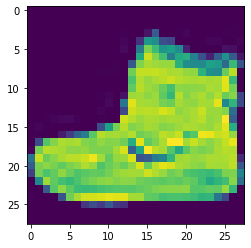

In [63]:
plt.imshow(train_image[0])

In [64]:
np.max(train_image[0])

255

In [65]:
train_label[0]

9

In [66]:
# 归一化
train_image = train_image/255
test_image = test_image/255

In [67]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [68]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [69]:
model.fit(train_image, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5007 - acc: 0.8242
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3747 - acc: 0.8643
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3359 - acc: 0.8786
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3145 - acc: 0.8850
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - acc: 0.8898


In [70]:
# 用测试数据集上做评价
model.evaluate(test_image, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.3631 - acc: 0.8676


[0.36310476064682007, 0.8676000237464905]

In [71]:
# 将train_label做成独热编码
train_label_onthot = tf.keras.utils.to_categorical(train_label)

In [72]:
train_label_onthot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [73]:
test_label_onthot = tf.keras.utils.to_categorical(test_label)

In [74]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [75]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [76]:
model.fit(train_image, train_label_onthot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5271 - acc: 0.8135
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4365 - acc: 0.8436
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4136 - acc: 0.8513
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3978 - acc: 0.8547
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3910 - acc: 0.8582


In [77]:
predict = model.predict(test_image)

In [78]:
predict.shape

(10000, 10)

In [79]:
np.argmax(predict[0])

9

In [80]:
test_label[0]

9

In [81]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [82]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)             

In [83]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [84]:
history = model.fit(train_image, train_label_onthot,
                    epochs=10,
                    validation_data=(test_image, test_label_onthot))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8853 - acc: 0.6686 - val_loss: 0.5456 - val_acc: 0.7997
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6351 - acc: 0.7705 - val_loss: 0.4831 - val_acc: 0.8280
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5871 - acc: 0.7863 - val_loss: 0.4594 - val_acc: 0.8333
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5626 - acc: 0.8007 - val_loss: 0.4482 - val_acc: 0.8362
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5479 - acc: 0.8041 - val_loss: 0.4412 - val_acc: 0.8407
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5345 - acc: 0.8104 - val_loss: 0.4454 - val_acc: 0.8497
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5214 - acc: 0.8153 - val_loss: 0.4275 - val_acc: 0.8468
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

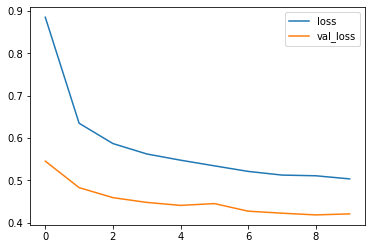

In [85]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

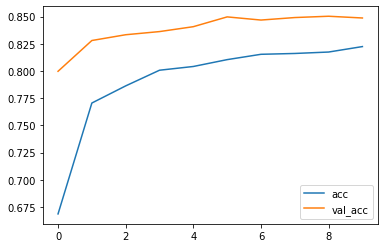

In [87]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

In [ ]:
过拟合
训练数据得分很高，测试数据得分相对较低
使用dropout人为丢弃部分隐藏单元
(增加训练数据、减小网络规模、正则化也可以
正则化的原理也是减小网络规模)

欠拟合
训练数据得分较低，测试数据得分较低
增加拟合能力：增加隐藏层网络单元，增加网络容量